Import

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler as ROS

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

Reading Data

In [51]:
df = pd.read_csv('../../data_sets/fetal_health.csv')
df.dtypes

print(df.describe())

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

Scaling Data

In [52]:
ss = StandardScaler()

df['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

unseen_data = df.sample(n=210)
remaining_data = df.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data , columns = df.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.350659,-0.821803,-0.198331,-1.494666,-0.637852,-0.060554,-0.265313,1.520469,-0.943666,1.779763,...,-0.165058,-1.073042,-2.125861,-0.703476,-0.459175,-1.075760,0.150781,-1.186408,1.957318,1.111080
1,-0.126215,0.719882,-0.198331,0.553085,0.374958,-0.060554,-0.265313,-1.721393,0.872115,-0.535879,...,1.543145,-0.868802,1.912680,0.662483,0.930681,0.219905,0.086107,0.132411,-0.228669,-0.525222
2,-0.024178,-0.050960,-0.198331,1.235669,0.374958,-0.060554,-0.265313,-1.779284,0.872115,-0.535879,...,1.543145,-0.868802,1.912680,0.320993,0.930681,0.219905,0.021434,-0.006412,-0.192833,-0.525222
3,-0.126215,0.976829,-0.198331,1.235669,-0.637852,-0.060554,-0.265313,-1.779284,1.212574,-0.535879,...,1.206681,-1.379402,0.342137,1.686952,-0.459175,-0.026888,0.086107,-0.006412,-0.264504,1.111080
4,0.077859,-0.564855,-0.198331,1.918253,2.400579,-0.060554,3.192782,-1.200380,5.184596,-0.535879,...,2.060783,-1.481522,2.024862,0.320993,3.710394,-3.790487,-1.789422,-2.158170,5.433396,-0.525222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.690081,-0.821803,-0.198331,0.894377,-0.637852,-0.060554,-0.265313,1.867811,-1.284125,0.810424,...,-0.786222,1.479958,0.734772,-0.020497,-0.459175,0.960285,0.991535,0.965349,-0.587027,-0.525222
1912,0.690081,-0.564855,-0.198331,0.894377,-0.637852,-0.060554,-0.265313,1.809921,-1.057152,0.648868,...,-0.113294,0.322598,0.286046,0.662483,-0.459175,0.898587,0.862189,0.895938,-0.551191,1.111080
1913,0.690081,-0.564855,-0.198331,0.894377,-0.637852,-0.060554,-0.265313,1.867811,-1.057152,0.541163,...,-0.087412,0.322598,0.342137,0.320993,-0.459175,0.960285,0.862189,0.965349,-0.515355,1.111080
1914,0.690081,-0.564855,-0.198331,0.553085,-0.637852,-0.060554,-0.265313,1.809921,-1.057152,0.918129,...,-0.113294,0.322598,0.286046,0.662483,-0.459175,0.898587,0.797515,0.895938,-0.515355,1.111080


In [53]:
ros = ROS(random_state=42)

x_res, y_res = ros.fit_resample(x,y)

Training

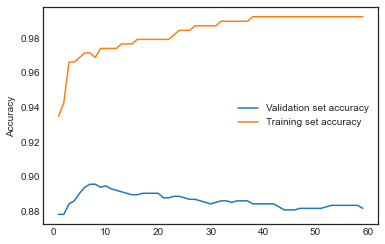

In [54]:
from sklearn.model_selection import train_test_split
target = remaining_data['fetal_health']
predictors = scaled_data.copy()

x_train, x_rest, y_train, y_rest = train_test_split(predictors,target, train_size=0.20,random_state= 42, stratify = target.values)
x_validate, x_test, y_validate, y_test = train_test_split(x_rest, y_rest, test_size=0.25, random_state=45)

sv = np.arange(1,60)
train_accuracy = np.empty(len(sv))
test_accuracy = np.empty(len(sv))

for i, k in enumerate(sv):
    svm = SVC(k)
    
    svm.fit(x_train, y_train)

    train_accuracy[i] = svm.score(x_train, y_train)
    test_accuracy[i] = svm.score(x_validate, y_validate)

plt.plot(sv, test_accuracy)
plt.plot(sv ,train_accuracy)

plt.legend(['Validation set accuracy','Training set accuracy'])
plt.ylabel('Accuracy')
plt.show()

warnings.filterwarnings('ignore')
warnings.warn('Delftstack')



SVM Model

SVM scores
0.8802083333333334
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       308
         1.0       0.63      0.41      0.50        46
         2.0       0.89      0.53      0.67        30

    accuracy                           0.88       384
   macro avg       0.81      0.64      0.70       384
weighted avg       0.87      0.88      0.87       384

Confusion matrix:
[[303   5   0]
 [ 25  19   2]
 [  8   6  16]]


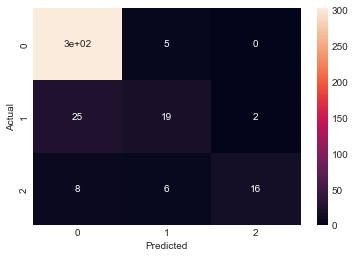

In [55]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {'SVM' : SVC(1)}
for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    confusion = sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
    confusion.set_xlabel("Predicted")
    confusion.set_ylabel("Actual")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)